# Documentação

`!pip install yfinance`

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd



## Requisitos
~~~python
!pip install yfinance
~~~

In [1]:
ticker = input('Insira o código do papel:')

Insira o código do papel:HGLG11.SA


In [5]:
n_steps = int(input('Quantas predições deseja?'))

Quantas predições deseja?50


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from functions import get_finance_data, get_forecast, get_auto_arima

plt.style.use('fivethirtyeight')

In [7]:
#ticker = "RBBV11.SA"
data = get_finance_data(ticker)
train = data['Low'][:len(data)-n_steps]
test = data['Low'][-n_steps:]

In [8]:
arima_model = get_auto_arima(ticker)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1522.874, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1465.446, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1524.731, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1444.227, Time=0.33 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1420.844, Time=0.66 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1417.004, Time=1.18 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1412.731, Time=3.28 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=1399.772, Time=9.70 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=1399.985, Time=4.04 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=1399.875, Time=26.14 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=1401.679, Time=9.29 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=1397.803, Time=8.15 sec
 ARIMA(0,1,0)(4,1,1)[12]    

In [65]:
def desvio(registro):
    return ((registro['predição']/registro['valor'])-1)*100

In [67]:
df = pd.DataFrame({'predição':arima_model.predict(n_periods=n_steps),'valor':test}, index=test.index)
df['desvio (%)'] = df.apply(desvio, axis=1)
#tentar adicionar colunas Previsto, Realizado, Desvio
df

,predição,valor,desvio (%)
Date,,,
2020-10-13,170.912284,172.550003,-0.949127
2020-10-14,171.401176,174.399994,-1.719506
2020-10-15,171.616575,173.500000,-1.085548
2020-10-16,171.538944,173.550003,-1.158778
2020-10-19,171.185511,172.190002,-0.583362
2020-10-20,170.495723,171.020004,-0.306561
2020-10-21,168.488267,170.410004,-1.127714
2020-10-22,168.591109,169.600006,-0.594869
2020-10-23,169.013780,170.279999,-0.743610


<function matplotlib.pyplot.show(*args, **kw)>

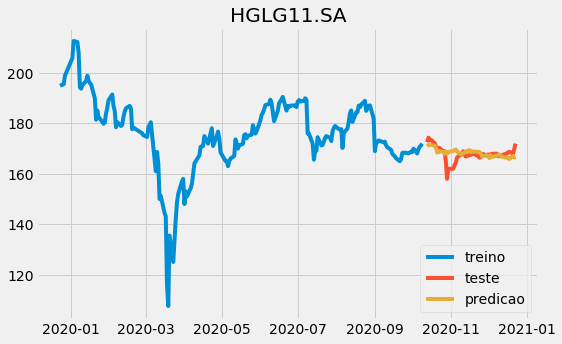

In [19]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd, label="predicao")
plt.legend(loc='lower right')
plt.title(label=ticker)
plt.show